# ATP Tennis Data - Raw Player Stats + One Hot Encoding (All Categorical Data)


In our previous notebooks, we saw that Gradient Bossting gave us the best results we left players stats as raw data and did not one hot encode our categorical data.

Non-ordinal categorical needs to be encoded as the values currently imply some type of importance. This will be our new baseline.

In this notebook, we will run the same models but all non-ordinal categorical data will be one hot encoded

Ordinal Categories:

* tournament level
* round of match

Non-ordinal Categories:

* tournament id
* player hand
* tournament surface
* player id
* player origin

### Results from the best model so far:

```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

* Grandient Boosting still gave us the best accuracy out of all models (see results below)
* One hot encoding our features did not affect our model accuracy much with Grandient Boost.
* All models but AdaBoost and Grandient Boost did give us accuracy performance boost which suggests that when we do not one hot encode our category features, the model may have been deriving the wrong information when treating those categories as normal features

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", True))

if DEBUG:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:

    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

In [3]:
X_test.columns

Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p1_seed', 'p2_age',
       ...
       'p2_126610', 'p2_126774', 'p2_128034', 'p2_133430', 'p2_144719',
       'p2_200000', 'p2_200005', 'p2_200282', 'p2_200615', 'best_of_3'],
      dtype='object', length=277)

# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

[LibLinear]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Model Score: 0.5833333333333334

ROC/AUC Score: 0.5625
              precision    recall  f1-score   support

        Loss       0.40      0.50      0.44         4
         Win       0.71      0.62      0.67         8

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12

      Loss  Win
Loss     2    2
Win      3    5


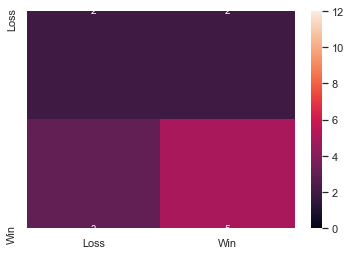

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary-test.csv


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

TypeError: fit() takes 3 positional arguments but 4 were given

In [9]:
knn.analyze()

NameError: name 'knn' is not defined

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

NameError: name 'knn' is not defined

# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5

ROC/AUC Score: 0.4375
              precision    recall  f1-score   support

        Loss       0.25      0.25      0.25         4
         Win       0.62      0.62      0.62         8

    accuracy                           0.50        12
   macro avg       0.44      0.44      0.44        12
weighted avg       0.50      0.50      0.50        12

      Loss  Win
Loss     1    3
Win      3    5


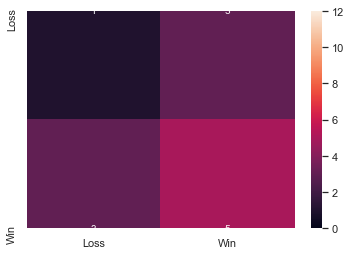

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary-test.csv


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.5833333333333334

ROC/AUC Score: 0.5625
              precision    recall  f1-score   support

        Loss       0.40      0.50      0.44         4
         Win       0.71      0.62      0.67         8

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12

      Loss  Win
Loss     2    2
Win      3    5


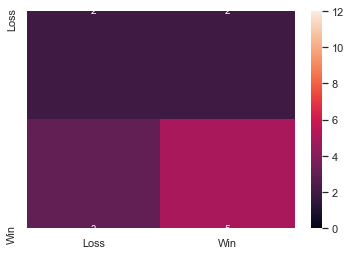

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary-test.csv


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.1941            0.06s
         2           1.0659            0.07s
         3           0.9574            0.07s
         4           0.8664            0.06s
         5           0.7868            0.06s
         6           0.7163            0.06s
         7           0.6560            0.06s
         8           0.6029            0.05s


Model Score: 0.5

ROC/AUC Score: 0.4375
              precision    recall  f1-score   support

        Loss       0.25      0.25      0.25         4
         Win       0.62      0.62      0.62         8

    accuracy                           0.50        12
   macro avg       0.44      0.44      0.44        12
weighted avg       0.50      0.50      0.50        12

      Loss  Win
Loss     1    3
Win      3    5


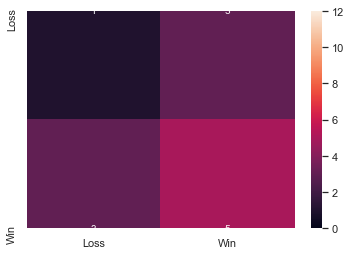

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary-test.csv


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.5

ROC/AUC Score: 0.4375
              precision    recall  f1-score   support

        Loss       0.25      0.25      0.25         4
         Win       0.62      0.62      0.62         8

    accuracy                           0.50        12
   macro avg       0.44      0.44      0.44        12
weighted avg       0.50      0.50      0.50        12

      Loss  Win
Loss     1    3
Win      3    5


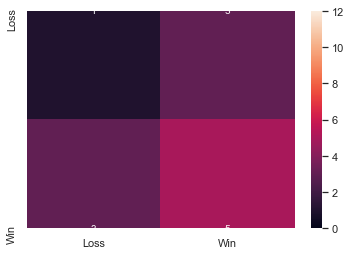

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary-test.csv


# Results

* Gradient Boosting is still giving us the best accuracy
* Accuracy improved slightly for all models except for AdaBoost and Grandient Boosting

In [28]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min,data_filter_file
0,LogisticRegression,ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.583333,0.5625,"{""0"": {""0"": 2, ""1"": 3}, ""1"": {""0"": 2, ""1"": 5}}","{""Loss"": {""precision"": 0.4, ""recall"": 0.5, ""f1...",../models/logisticregression-1998-2018-ohe-tes...,0.0,0.0,0.0,NaN
1,DecisionTreeClassifier,ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.500000,0.4375,"{""0"": {""0"": 1, ""1"": 3}, ""1"": {""0"": 3, ""1"": 5}}","{""Loss"": {""precision"": 0.25, ""recall"": 0.25, ""...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0,NaN
2,RandomForestClassifier,ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.583333,0.5625,"{""0"": {""0"": 2, ""1"": 3}, ""1"": {""0"": 2, ""1"": 5}}","{""Loss"": {""precision"": 0.4, ""recall"": 0.5, ""f1...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0,NaN
3,GradientBoostingClassifier,ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.500000,0.4375,"{""0"": {""0"": 1, ""1"": 3}, ""1"": {""0"": 3, ""1"": 5}}","{""Loss"": {""precision"": 0.25, ""recall"": 0.25, ""...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0,NaN
4,AdaBoostClassifier,ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.500000,0.4375,"{""0"": {""0"": 1, ""1"": 3}, ""1"": {""0"": 3, ""1"": 5}}","{""Loss"": {""precision"": 0.25, ""recall"": 0.25, ""...",../models/adaboostclassifier-1998-2018-ohe-tes...,0.0,0.0,0.0,NaN


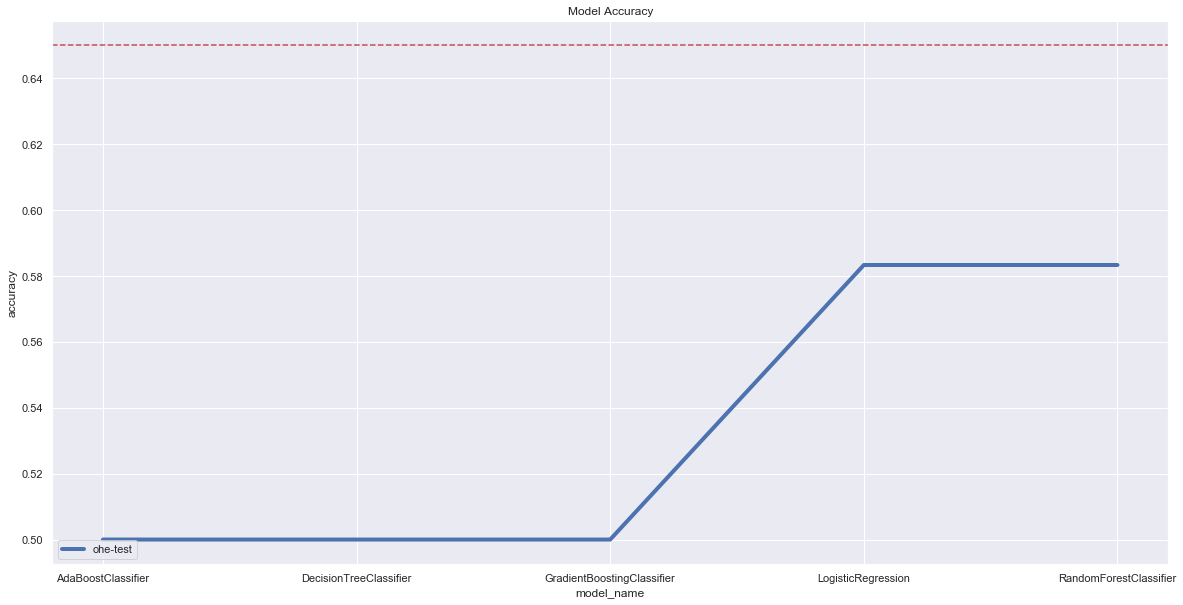

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [30]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [31]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

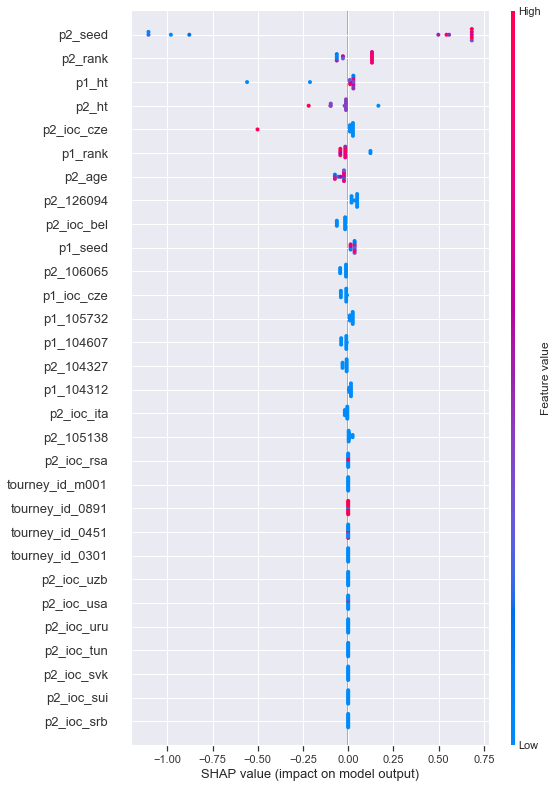

In [32]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [33]:
print(f'Last Finished: {datetime.now().strftime("%y-%m-%d %H:%M")}')

Last Finished: 19-10-26 09:45
